In [64]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from app.basic_operations import bilateral_smooth_image, quantization

In [2]:
def imshow(img, cmap=None, title=None):
    figsize = (img.shape[0]//40, img.shape[1]//40)
    plt.figure(figsize=figsize)
    if cmap is None and len(img.shape) == 2:
        cmap = "gray"
    if cmap is None:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap)
    if title is not None:
        plt.title(title)

In [3]:
lena_url = "../img/lena.bmp"
assert os.path.isfile(lena_url)
candle_url = "../img/candle.png"
assert os.path.isfile(candle_url)
people_url = "../img/people.jpg"
assert os.path.isfile(people_url)

In [26]:
lena = cv2.cvtColor(cv2.imread(lena_url), cv2.COLOR_BGR2RGB)
candle = cv2.cvtColor(cv2.imread(candle_url), cv2.COLOR_BGR2RGB)
people = cv2.cvtColor(cv2.imread(people_url), cv2.COLOR_BGR2RGB)

In [124]:
def DoG_edge(img, low_sigma, high_sigma):
    low_sigma_img = cv2.GaussianBlur(img,[low_sigma]*2,0)
    high_sigma_img = cv2.GaussianBlur(img,[high_sigma]*2,0)
    dog = cv2.cvtColor(
        np.maximum(0, low_sigma_img - high_sigma_img), 
        cv2.COLOR_BGR2GRAY
    )
    return dog
def bilateral(img, d, sigma, n_recurssion):
    smoothed = img.copy()
    for i in range(n_recurssion):
        smoothed = cv2.bilateralFilter(
            smoothed, d, sigma, sigma
        )
    return smoothed

def median(img, d):
    median = cv2.medianBlur(img, d)
    return median

def luminance_quantization(img, n_clusters):
    clt = MiniBatchKMeans(n_clusters=n_clusters)
    image = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    (h, w) = image.shape[:2]
    labels = clt.fit_predict(image[:,:,0].reshape((w * h, 1)))
    quant = image
    quant[:, :, 0:1] = clt.cluster_centers_.astype("uint8")[labels].reshape((h, w, 1))
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2RGB)
    return quant
    

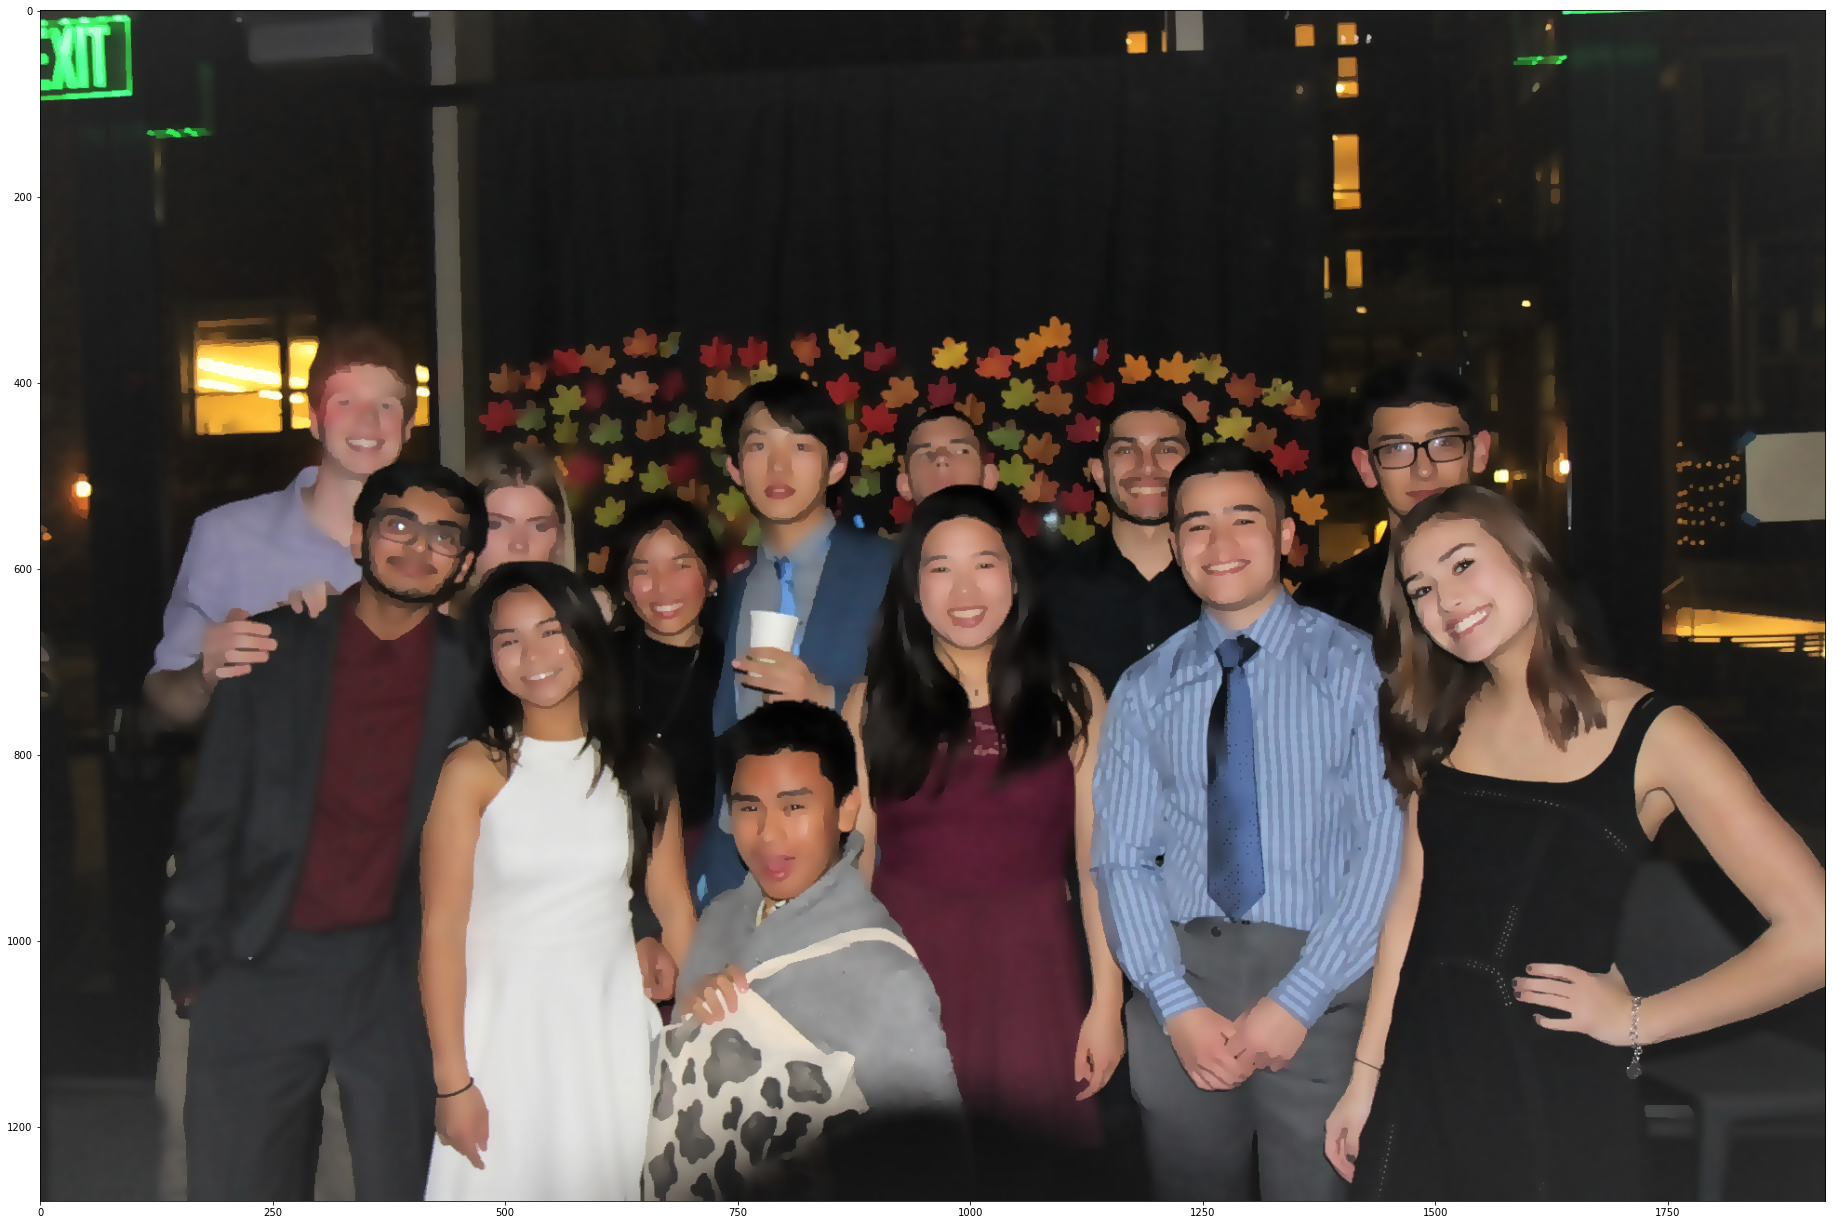

In [127]:
img_bilateral = bilateral(people, 5, 20, 30)
imshow(img_bilateral)

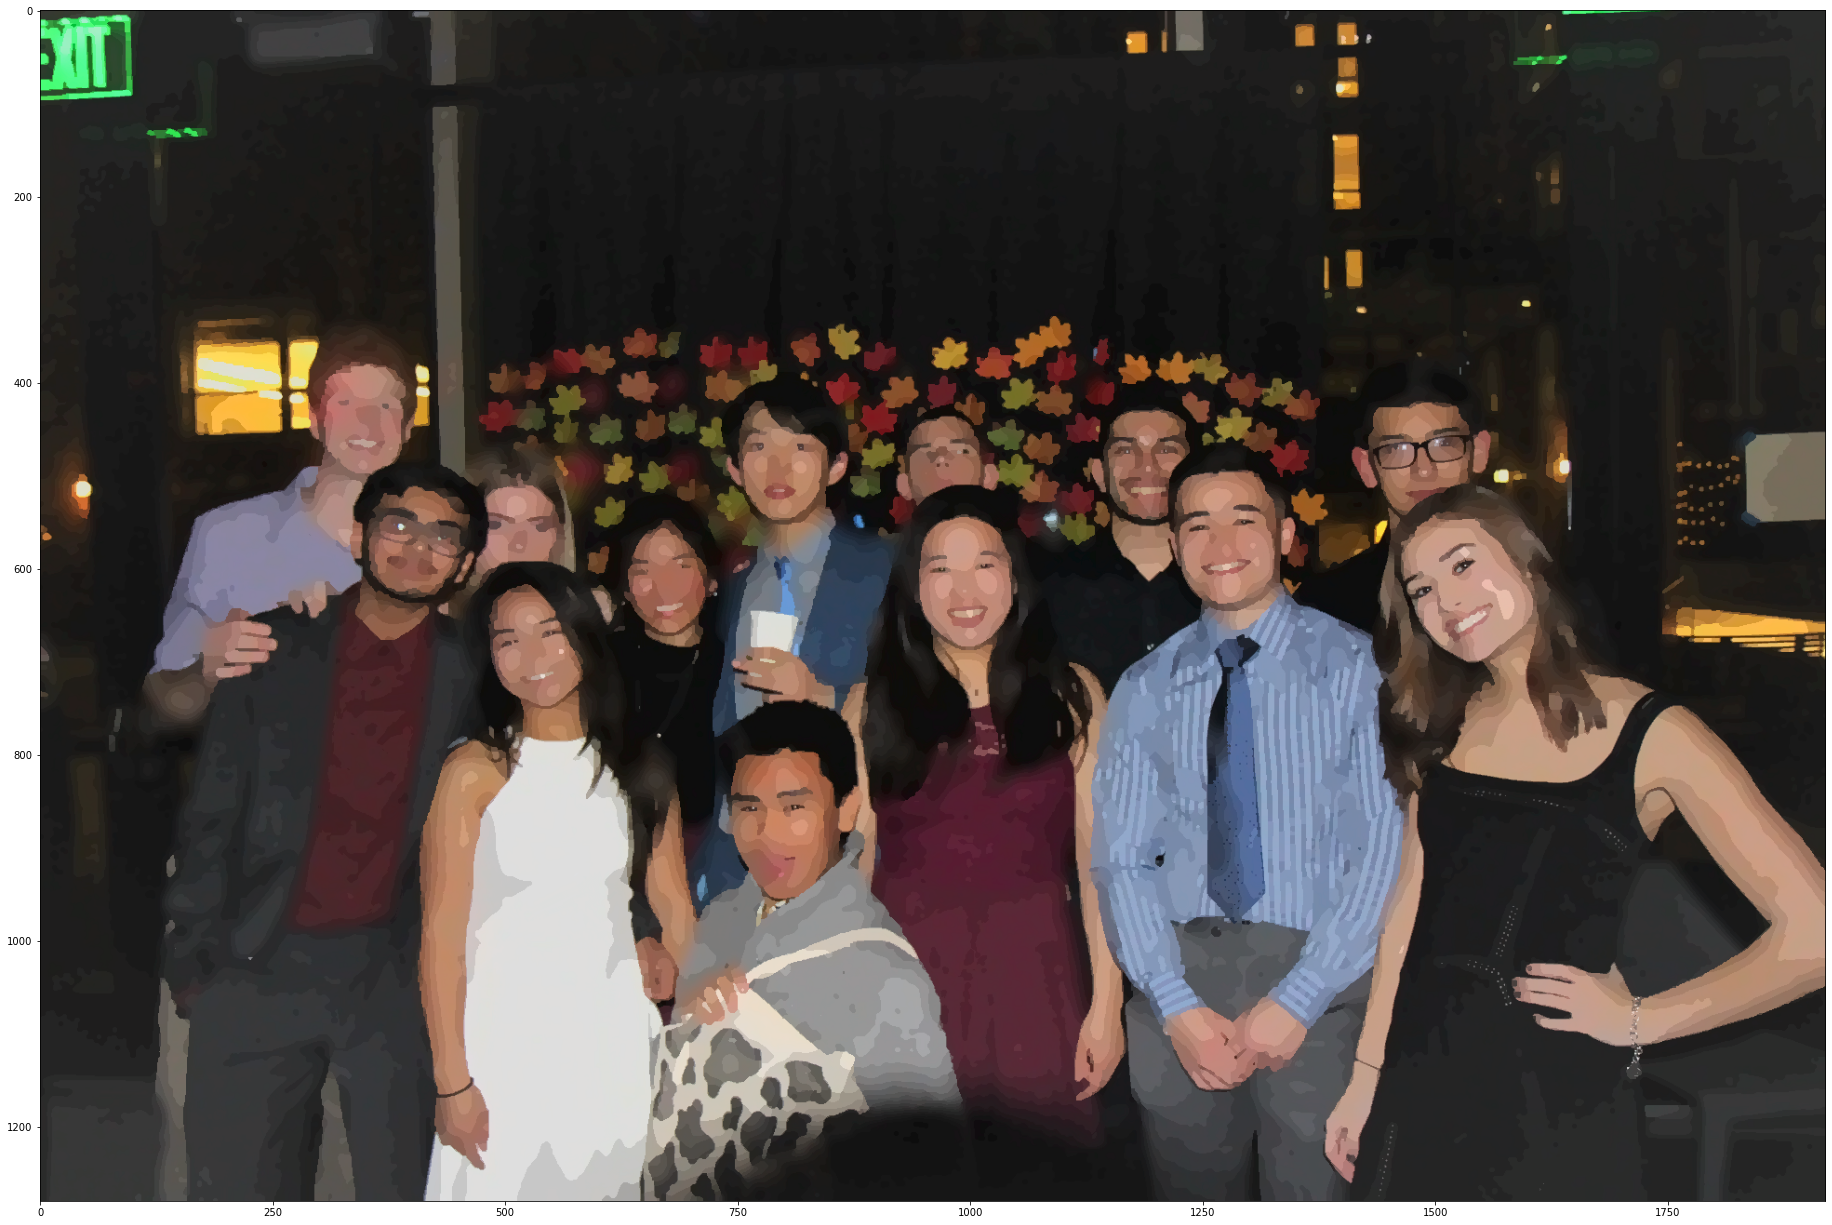

In [126]:
img_quan = luminance_quantization(img_bilateral, 20)
imshow(img_quan)

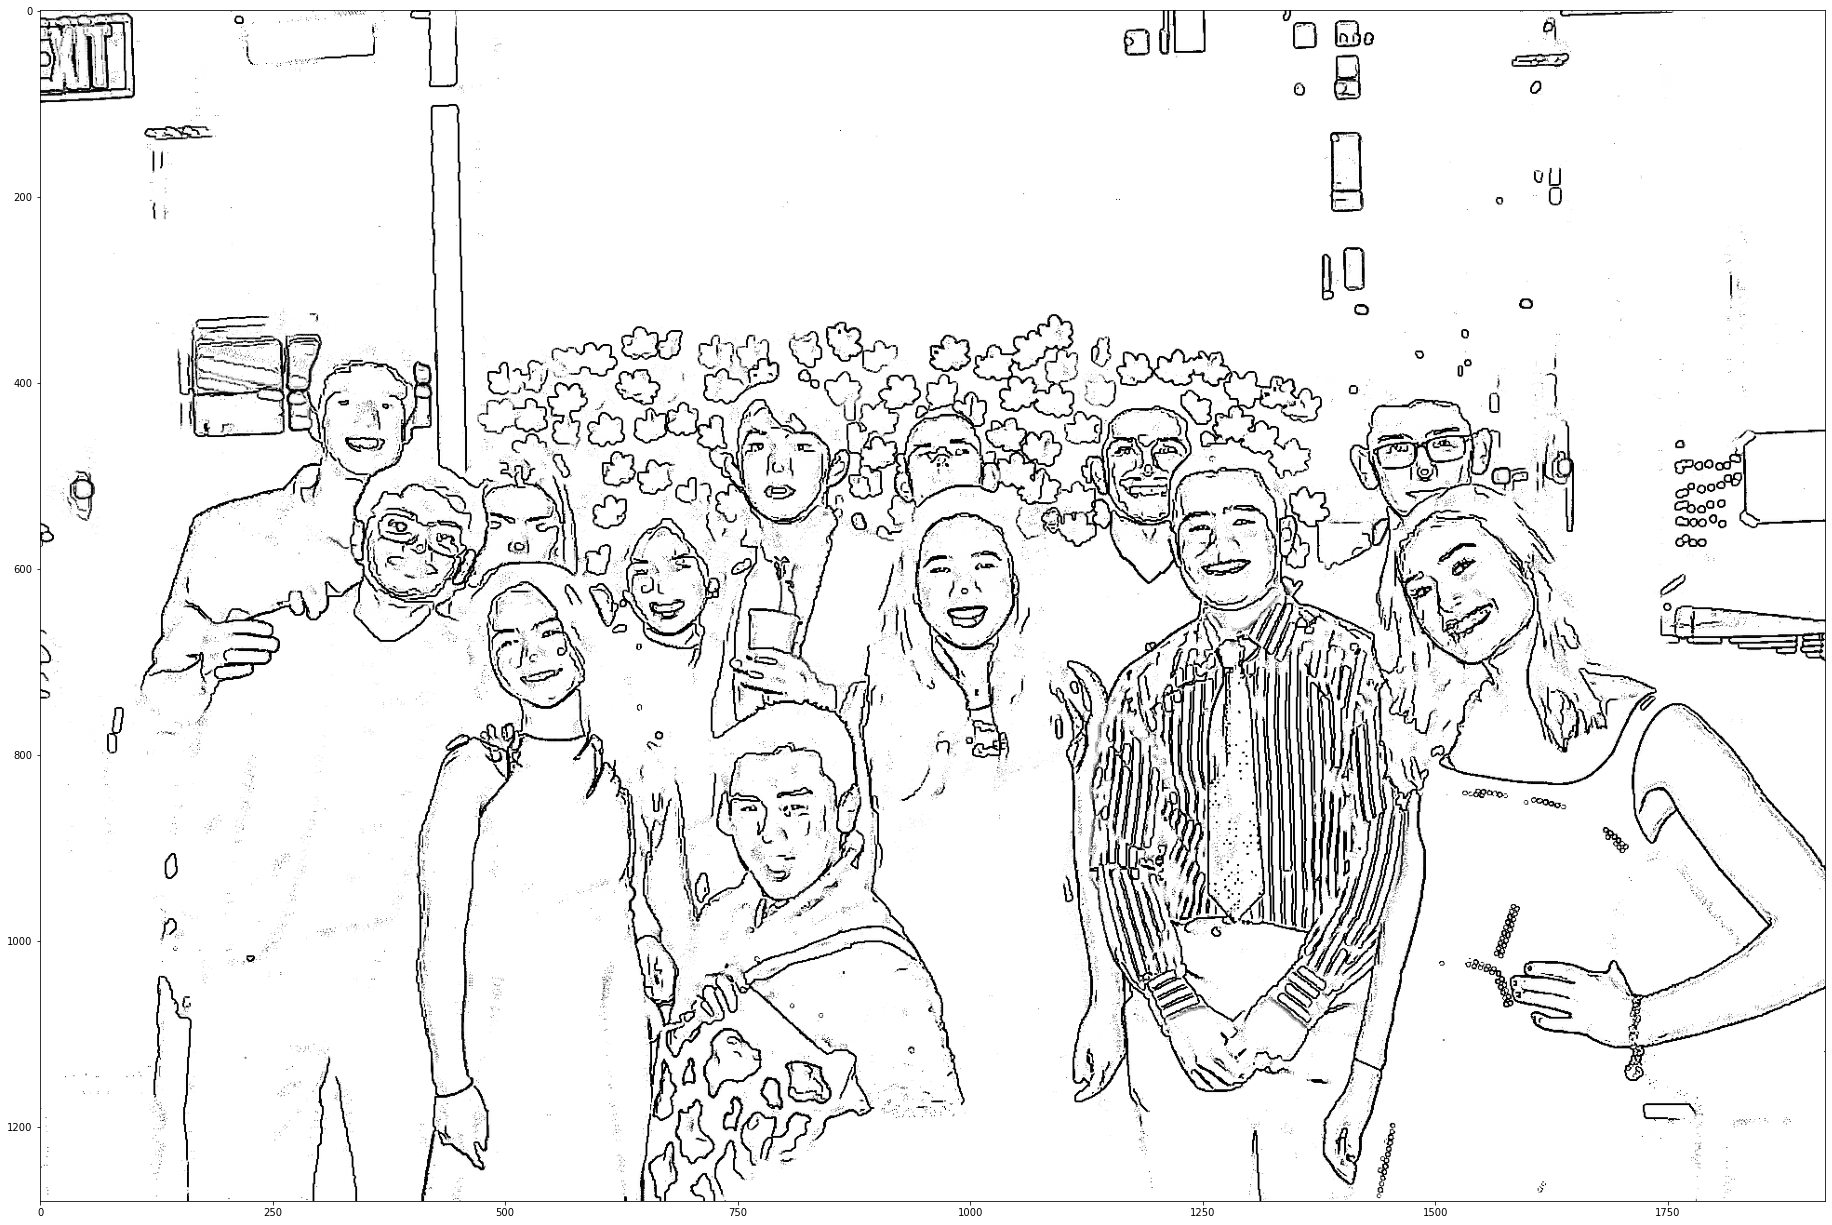

In [128]:
img_edge = DoG_edge(img_bilateral, 3, 5)
img_edge = np.dstack((img_edge, img_edge, img_edge))
imshow(255-img_edge)

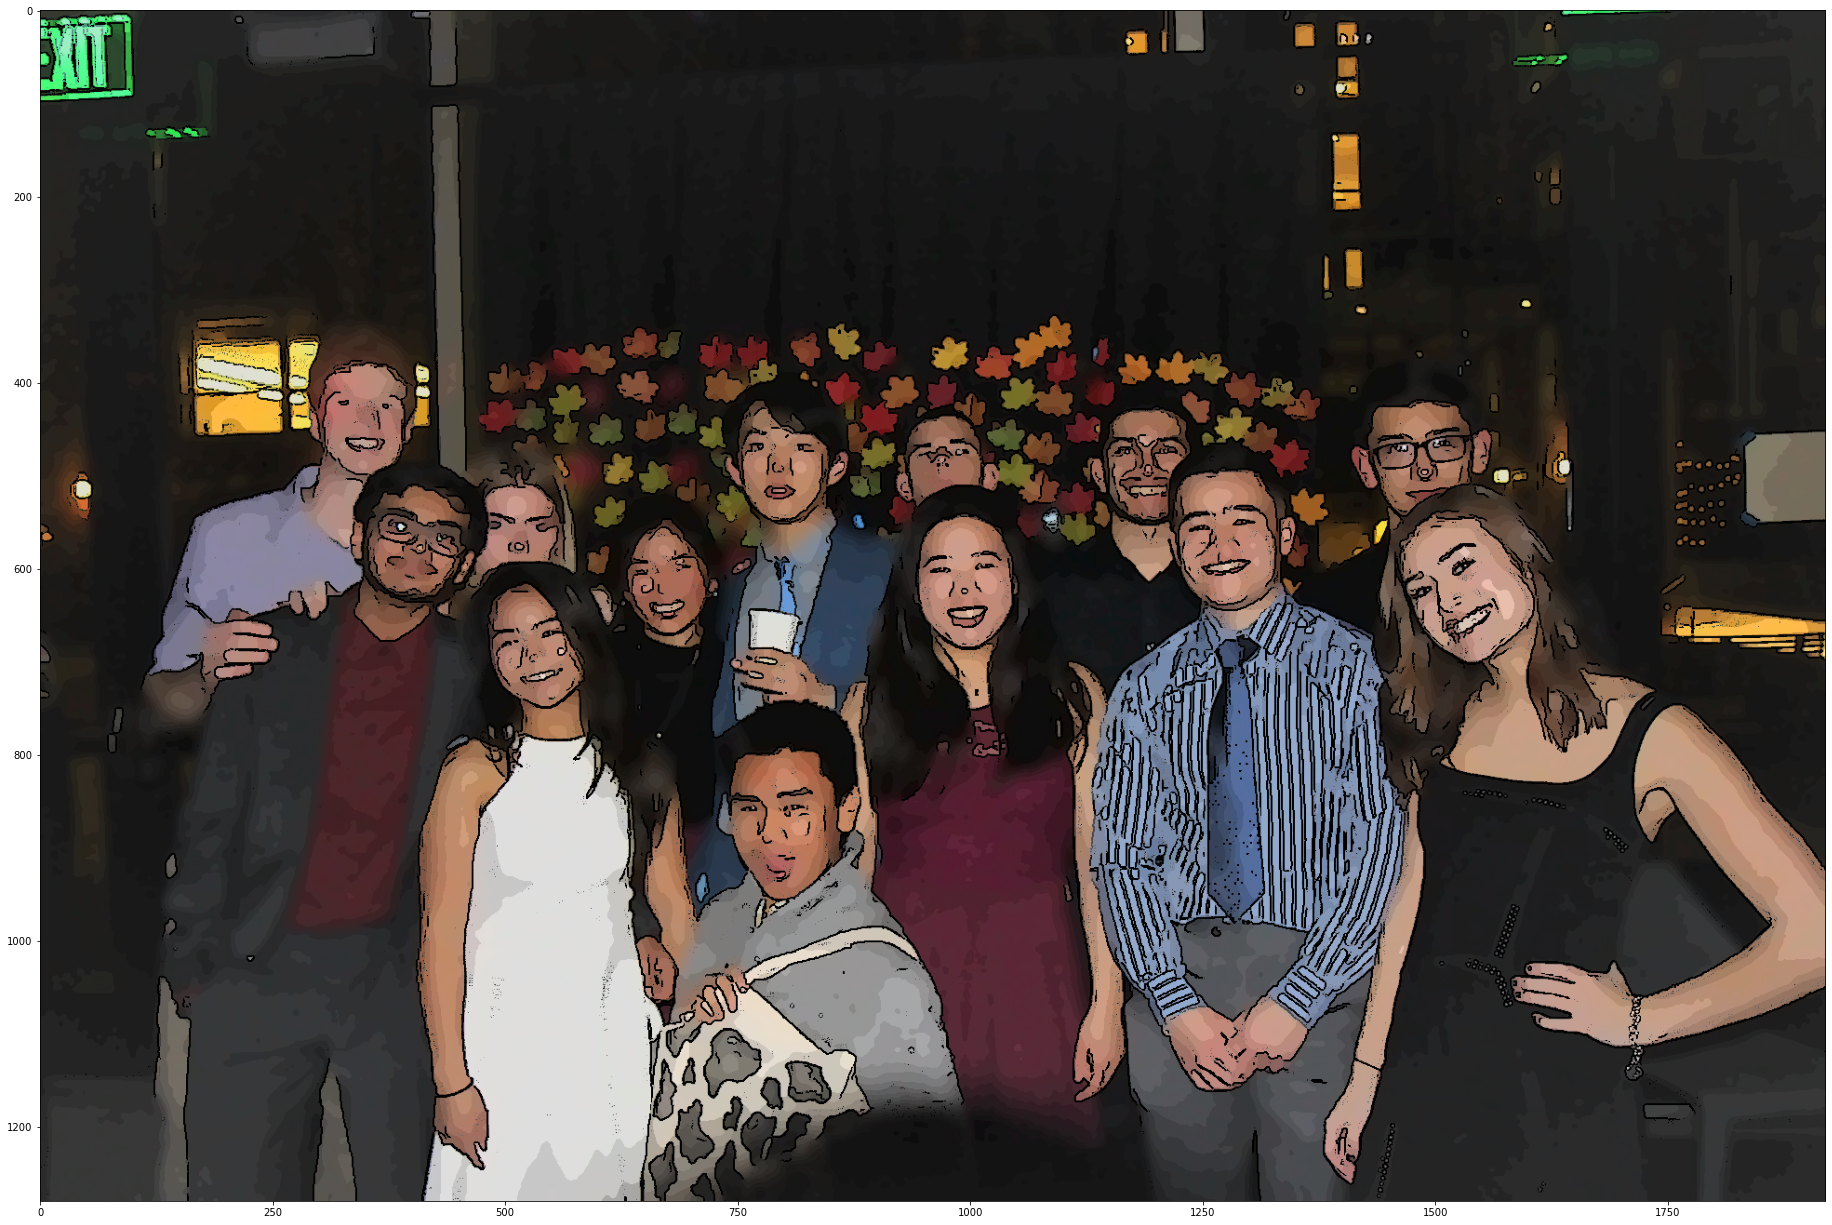

In [132]:
imshow(np.minimum((255-img_edge),img_quan))

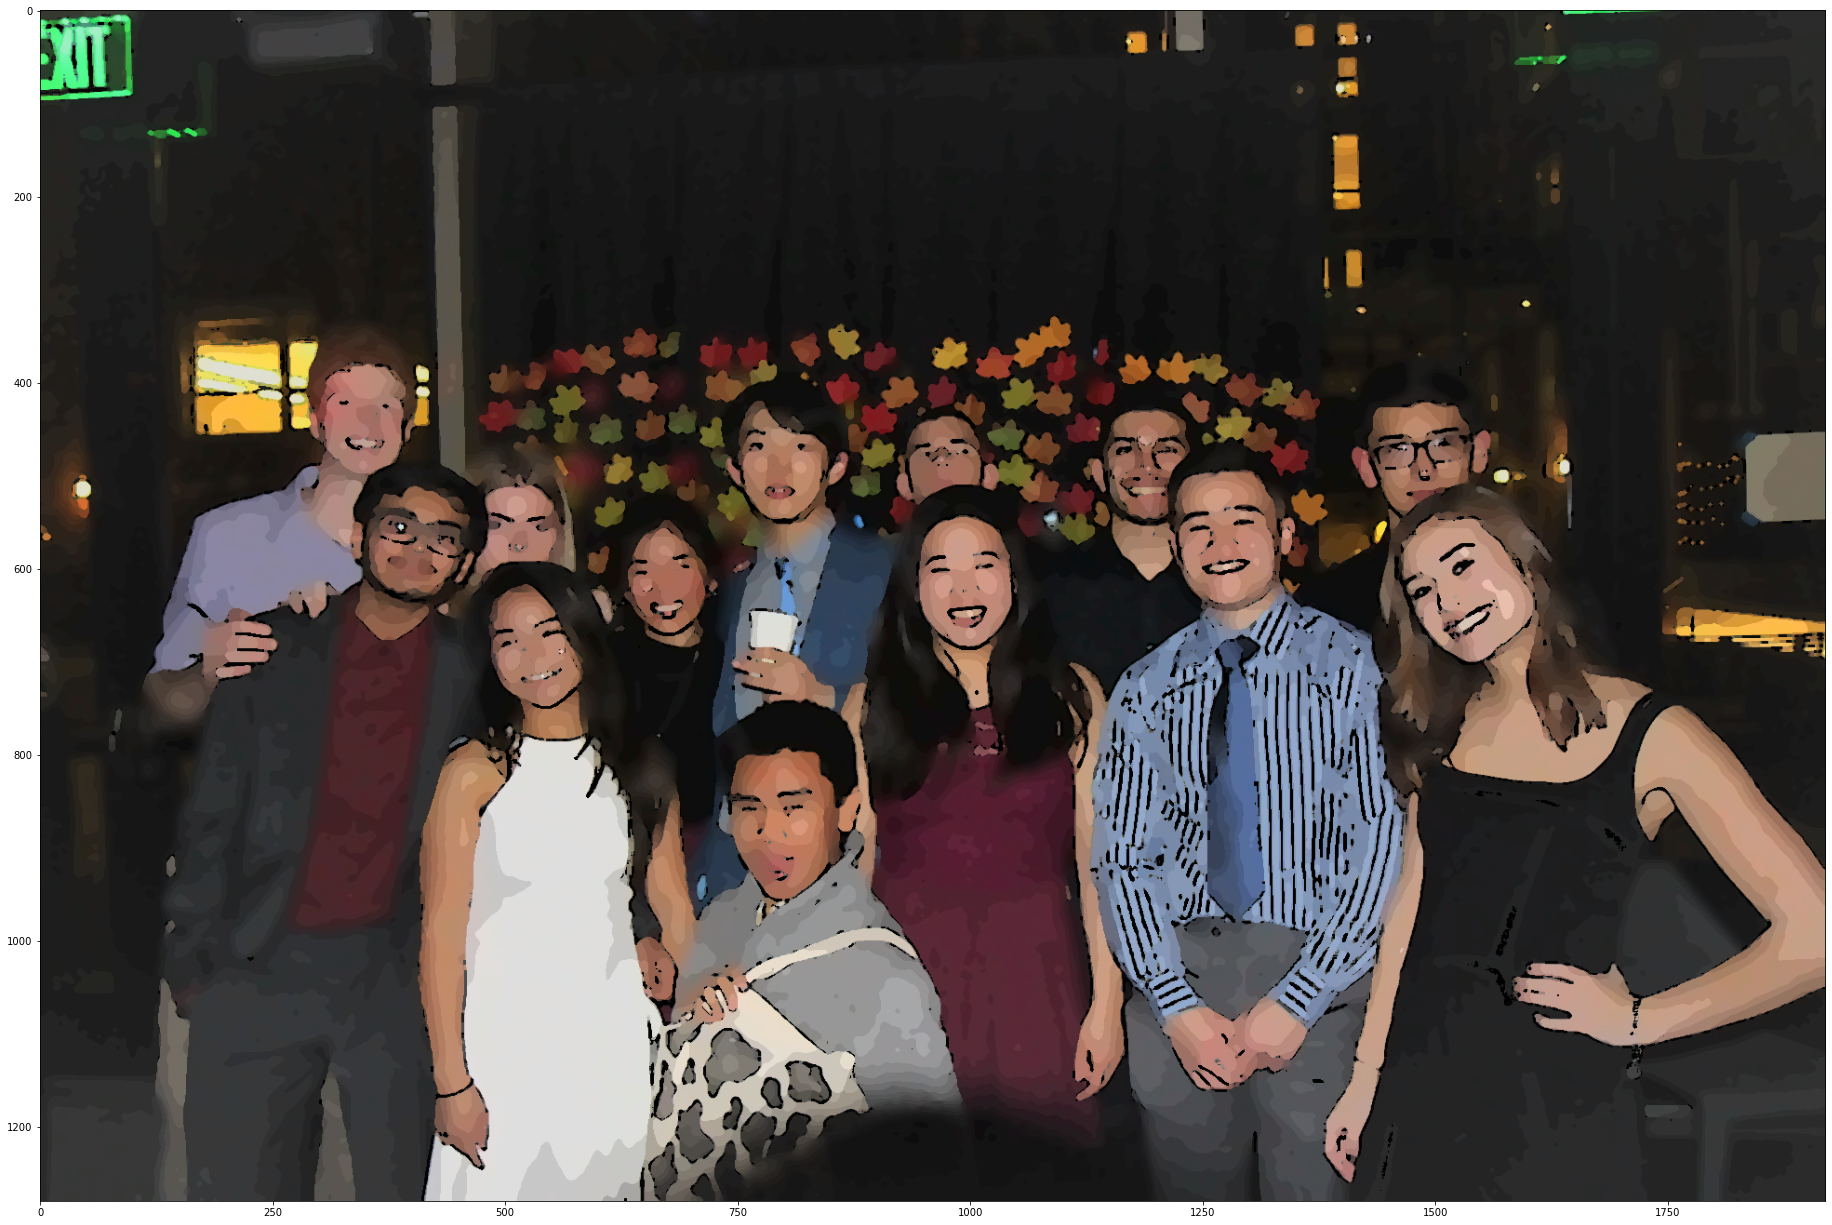

In [134]:
imshow(median(np.minimum((255-img_edge),img_quan), 5))